In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from database import MongoRepository
from statsmodels.stats.power import GofChisquarePower
from statsmodels.stats.contingency_tables import Table2x2

### Preparing the experiement

To determine the number of people we should include in our study, we will do a statistical power.

* Effect Size

    * Difference between groups we want to be able to detect.
    * small -> 0.2
    * medium -> 0.5
    * large -> 0.8

**Calculating Statistical power**

* Alpha ($\alpha$) and Beta ($\beta$)
    * Probability of making incorrect conclusion.

* $\alpha$ - probability of a False Positive
* $\beta$ - probabil;ity of a False Negative

$\alpha$ = 0.05
$\beta$ = 0.8

In [2]:
repo =MongoRepository()
ds_applicants = repo.collection


Calculating the number of participants needed for a smallest effect size of 0.2.

In [4]:
chi_square_power = GofChisquarePower()
group_size = math.ceil(chi_square_power.solve_power(effect_size=0.2, alpha=0.05, power =0.8))
total_number_of_participants = group_size * 2
print(f"Number of participants in each group is {group_size}")
print(f"Total number of participants in the entire experiements is {total_number_of_participants}.")

Number of participants in each group is 197
Total number of participants in the entire experiements is 394.


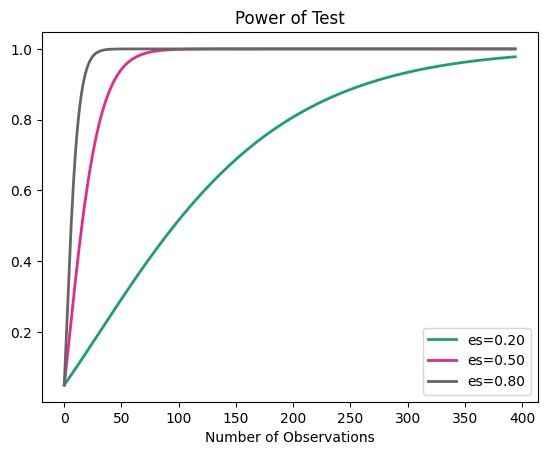

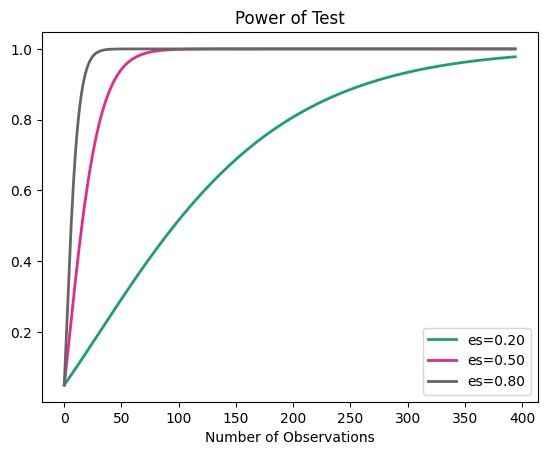

In [5]:
n_observations = np.arange(0, total_number_of_participants + 1)
effect_sizes = np.array([0.2, 0.5, 0.8])

chi_square_power.plot_power(dep_var="nobs",
                            nobs=n_observations,
                            effect_size = effect_sizes,
                            alpha = 0.05,
                            n_bins = 2)


In [6]:
results = ds_applicants.aggregate(
    [
        {"$match":{"admissionsQuiz":"incomplete"}},
        {
            "$group":{"_id":{"$dateTrunc":{"date":"$createdAt", "unit":"day"}},
                    "count":{"$sum":1}}
        }
    ]
)
print(type(results))

<class 'pymongo.synchronous.command_cursor.CommandCursor'>


In [7]:
df =(pd.DataFrame(results)
    .rename({"_id":"date", "count":"new_users"}, axis=1)
    .set_index("date")
    .sort_index()
    .squeeze()
)
df.head()

date
2024-01-01     5
2024-01-02     6
2024-01-03    13
2024-01-04     9
2024-01-05    11
Name: new_users, dtype: int64

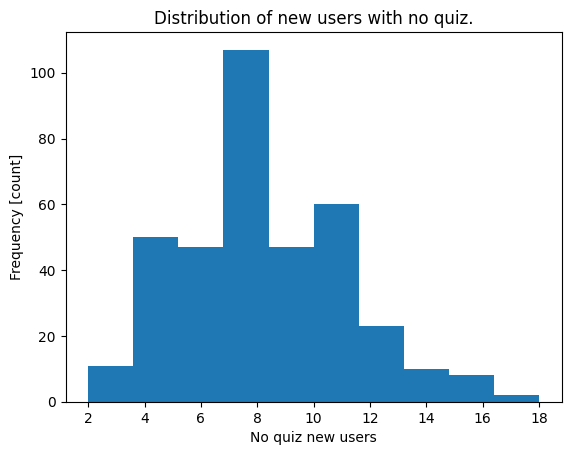

In [8]:
df.hist(grid=False)
plt.xlabel("No quiz new users")
plt.ylabel("Frequency [count]")
plt.title("Distribution of new users with no quiz.");

Calculating the average number of no quiz applicants per day.

In [9]:
mean = df.describe()["mean"]
std = df.describe()["std"]
print("The average of no quiz applicants per day is", round(mean,2))
print("The std of no quiz applicants per day is", round(std,2))

The average of no quiz applicants per day is 8.16
The std of no quiz applicants per day is 2.82


We need to know how many days we need to run the experiement for in order to have the 394 applicants who did not complete the quiz on sign up.
Given that each day we get around 8 no quiz applicant. We might think we will need roughly 50 days because $8*50=400$ but we are not sure we will get exactly 8 no quiz applicants each day. we might get more or even.

The average value calculated above is for the distribution plotted above which is a distribution of no quiz applicants per day.

Given this value I will estimate the average of 50 days.(What a statistic! but tertiary said chi-square in a non-parametric distribution!!??)